# Evaluation of Performance based on the Posegraph in g2o format
- Please run the file **test_graph_performance_with_g2o_dataset_A** before this file!
- Make sure that the inital working directory is **"./sobot_rimulator/script"**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')  # set the working directory as "./sobot_rimulator"
os.getcwd()

'/home/yixing/code/project_work/sobot-rimulator'

# Analysis of Time Cost

In [2]:
solver = "Cholesky"  #  cholesky or spsolve
df = pd.read_csv("./scripts/result/time_cost_g2o_{0}.csv".format(solver.lower()))
df["log_global_error"] = np.log(df["global_error"])
df.head(15)

,name,iteration,linearization_time_cost,solve_time_cost,global_error,solver,log_global_error
0,INTEL,0,0.000000,0.000000,5.149721e+06,cholesky,15.454453
1,INTEL,1,0.305283,0.001590,1.511636e+08,cholesky,18.833873
2,INTEL,2,0.329507,0.001656,5.143087e+06,cholesky,15.453164
3,INTEL,3,0.364126,0.002427,3.266647e+04,cholesky,10.394104
4,INTEL,4,0.341682,0.001556,2.158643e+02,cholesky,5.374650
5,INTEL,5,0.289461,0.003079,2.158333e+02,cholesky,5.374506
6,INTEL,6,0.307643,0.001626,2.158333e+02,cholesky,5.374506
7,INTEL,7,0.272456,0.001597,2.158334e+02,cholesky,5.374507
8,INTEL,8,0.317468,0.001605,2.158335e+02,cholesky,5.374507
9,INTEL,9,0.265859,0.001582,2.158333e+02,cholesky,5.374507


name
MITB     0.214191
INTEL    0.316613
M3500    1.270573
dtype: float64

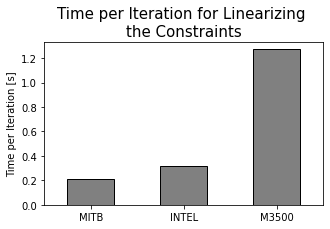

In [3]:
linear_time = df.pivot(index = "iteration", columns = "name", 
            values="linearization_time_cost")
linear_time = linear_time[linear_time.index != 0]
linear_time = linear_time[["MITB", "INTEL", "M3500"]]
linear_time = linear_time.mean()
# colors=['black', 'dimgray','darkgray']
linear_time.plot(kind = "bar", rot = 0, color = "gray", edgecolor="k", figsize=(5,3))
plt.xlabel("")
plt.ylabel("Time per Iteration [s]")
plt.title("Time per Iteration for Linearizing \nthe Constraints", size = 15)
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),
#          fancybox=True, shadow=True)
plt.savefig('./scripts/fig/{0}.eps'.format("Time_per_Iteration_for_Linearizing_the_Constraints"), 
            format='eps', bbox_inches='tight')
linear_time


name
MITB     0.000969
INTEL    0.001828
M3500    0.010817
dtype: float64

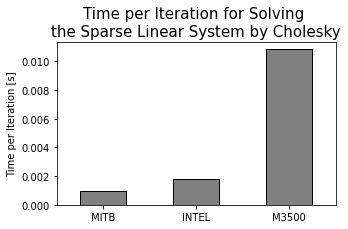

In [4]:
solve_time = df.pivot(index = "iteration", columns = "name", values="solve_time_cost")
solve_time = solve_time[solve_time.index != 0]
solve_time = solve_time[["MITB", "INTEL", "M3500"]]
solve_time = solve_time.mean()
# colors=['black', 'dimgray','darkgray']
solve_time.plot(kind = "bar", rot = 0, color = "gray", edgecolor="k", figsize=(5,3))
plt.xlabel("")
plt.ylabel("Time per Iteration [s]")
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5),
#          fancybox=True, shadow=True)
plt.title("Time per Iteration for Solving \nthe Sparse Linear System by {0}".format(solver), size = 15)
plt.savefig('./scripts/fig/{0}.eps'.format("Time_per_Iteration_for_Solving_the_Sparse_Linear_System"), 
            format='eps', bbox_inches='tight')
solve_time


# Evaluation of Convergency

name,INTEL,M3500,MITB
iteration,,,
0,15.454453,14.758119,22.208088
1,18.833873,12.987964,23.688812
2,15.453164,9.910266,19.863481
3,10.394104,5.576181,17.940031
4,5.374650,4.926852,18.599890
5,5.374506,4.926623,15.444616
6,5.374506,4.926623,12.998432
7,5.374507,4.926623,7.518804
8,5.374507,4.926623,6.688553


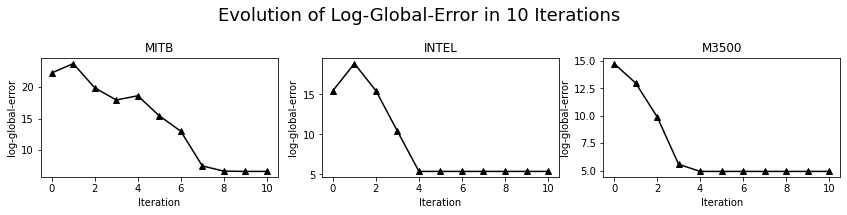

In [5]:
global_error = df.pivot(index = "iteration", columns = "name", values="log_global_error")

plt.subplot(1,3,2)
global_error["INTEL"].plot(color = "k", marker = "^", rot = 0, figsize=(12,3))
plt.xlabel("Iteration")
plt.ylabel("log-global-error")
plt.title("INTEL")

plt.subplot(1,3,3)
global_error["M3500"].plot(color = "k", marker = "^", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("log-global-error")
plt.title("M3500")

plt.subplot(1,3,1)
global_error["MITB"].plot(color = "k", marker = "^", rot = 0)
plt.xlabel("Iteration")
plt.ylabel("log-global-error")
plt.title("MITB")
plt.suptitle("Evolution of Log-Global-Error in 10 Iterations", size = 18)
plt.tight_layout()
plt.savefig('./scripts/fig/{0}.eps'.format("Evolution_of_Global_Error"), format='eps')
global_error
